In [2]:
import pandas  as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [106]:
df = pd.read_csv("Real_Estate.csv")
df.head(5)

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [114]:
df.drop(columns=["Transaction date"],inplace=True)

In [118]:
x = df.iloc[:,:-1]
y = df["House price of unit area"]

sd = StandardScaler()

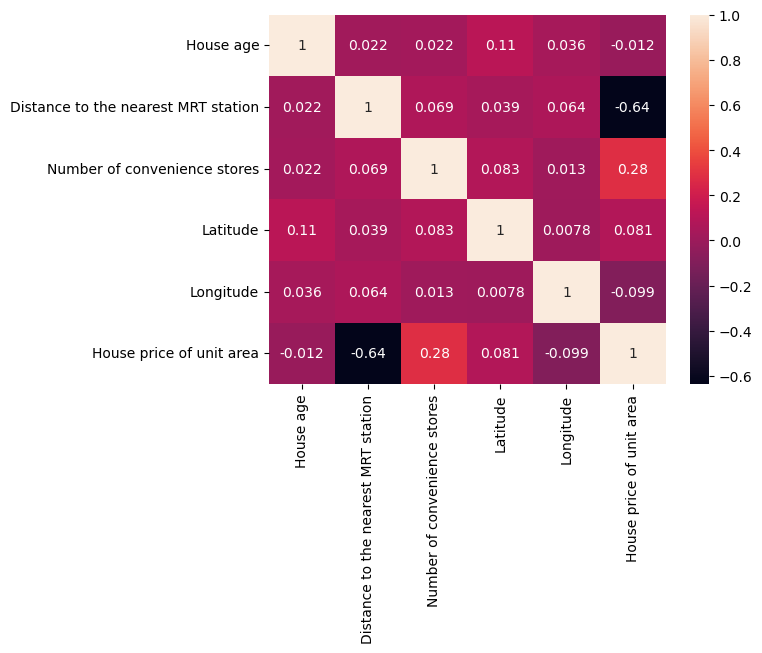

In [116]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [120]:
sd.fit(x)
sd.transform(x)

array([[-0.43471616,  2.52450329,  1.29797598,  1.38529149,  1.53679991],
       [ 1.4556975 , -0.66129988, -0.78751712,  1.59604714,  0.99131113],
       [-1.47359214,  0.76482921,  1.99314034,  1.25241649,  0.29932618],
       ...,
       [-1.56726128, -0.51269532,  1.29797598, -0.40182985,  0.85767083],
       [ 1.48975901, -0.64541822,  0.25522943,  1.00448848,  1.41036241],
       [-0.54541606, -0.81486622,  0.60281161, -0.85721194,  0.22731888]])

In [122]:
x = pd.DataFrame(sd.transform(x),columns=x.columns)

In [124]:
x

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,-0.434716,2.524503,1.297976,1.385291,1.536800
1,1.455698,-0.661300,-0.787517,1.596047,0.991311
2,-1.473592,0.764829,1.993140,1.252416,0.299326
3,0.323152,-0.007865,0.255229,-0.443827,-1.413003
4,-0.843454,-0.081208,0.602812,1.550023,-1.495810
...,...,...,...,...,...
409,-0.008947,-0.748211,0.602812,0.313909,-1.241646
410,-0.553931,-0.619740,-0.787517,-0.974573,-1.348459
411,-1.567261,-0.512695,1.297976,-0.401830,0.857671
412,1.489759,-0.645418,0.255229,1.004488,1.410362


In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [128]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [188]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

In [130]:
lr = LinearRegression()

In [132]:
lr.fit(x_train,y_train)

LinearRegression()

In [142]:
lr.score(x_test,y_test)*100

54.95657614291125

In [194]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

124.60907371015269
9.518530054594086
11.162843441979856


In [162]:
# Lasso Technique
la = Lasso(alpha=0.04)

In [164]:
la.fit(x_train,y_train)

Lasso(alpha=0.04)

In [166]:
la.score(x_test,y_test)*100

54.98402464277334

In [196]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

124.53313960369131
9.514180168732862
11.15944172455286


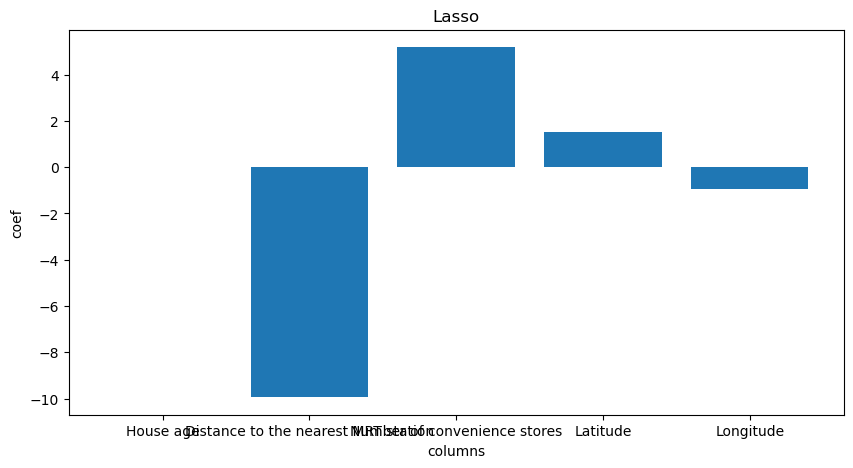

In [168]:
plt.figure(figsize=(10,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()


In [174]:
# ri.fit(x_train,y_train)
# ri.score(x_test,y_test)
Ri = Ridge(alpha=0.04)

In [182]:
Ri.fit(x_train,y_train)
Ri.score(x_test,y_test)*100

54.95564586537709

In [198]:
print(mean_squared_error(y_test,Ri.predict(x_test)))
print(mean_absolute_error(y_test,Ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,Ri.predict(x_test))))

124.61164724945984
9.51843862291981
11.162958713954819


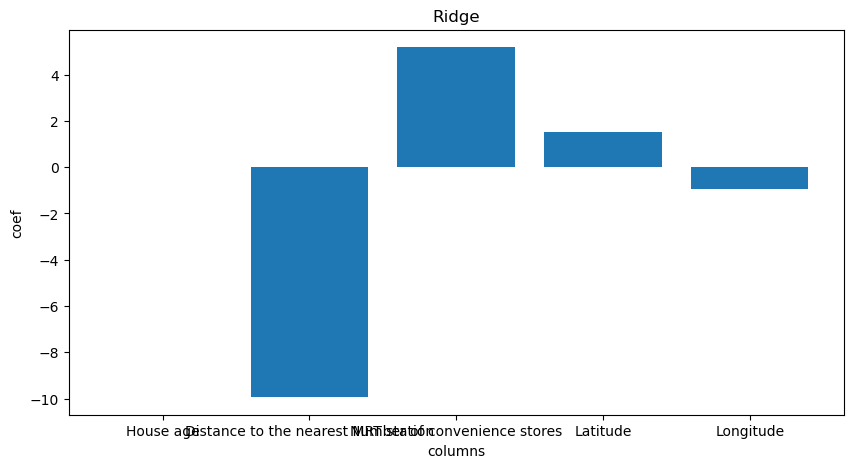

In [184]:
plt.figure(figsize=(10,5))
plt.bar(x.columns,la.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()


In [ ]:
df = pd.DatFrame({"col_nam":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":R